# Marcos Barragán Corredera

https://www.linkedin.com/in/marcos-barragán-corredera-7415931b7

# Adrián González Retamosa

https://www.linkedin.com/in/adrián-gonzález-retamosa-b283a51b3

### Machine Learning 

### CUNEF

#### 04/12/2020

## SVM 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from numpy import genfromtxt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn import model_selection, metrics, linear_model
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot

import sklearn.metrics as skm

pd.set_option('display.max_columns', None)

In [2]:
x_train = pd.read_csv('../data/x_train.csv')
x_test = pd.read_csv('../data/x_test.csv')
y_train = pd.read_csv('../data/y_train.csv')
y_test = pd.read_csv('../data/y_test.csv')

We have developed several models, but we will only consider the best for our data. 

We define the SVM model for our data

In [ ]:
%%time
svclassifier = SVC(max_iter = 1000, kernel = 'rbf')
svclassifier.fit(x_train, y_train)

Save the models:

In [ ]:
def saved(nombre, modelo):
    with open(nombre, 'wb') as file:
        pickle.dump(modelo, file)

In [ ]:
saved('./modelos/SVM', svclassifier)

Load the SVM model

In [4]:
svm_m = pickle.load(open( "../modelos/SVM", "rb"))

Calculate the prediction for our data:

In [6]:
pred_svm = svm_m.predict(x_test)

In [7]:
print(classification_report(y_test,pred_svm))

print("Accuracy:", metrics.accuracy_score(y_test, pred_svm)*100, '%')

              precision    recall  f1-score   support

           0       0.38      0.60      0.46     34968
           1       0.83      0.66      0.74    103690

    accuracy                           0.65    138658
   macro avg       0.60      0.63      0.60    138658
weighted avg       0.72      0.65      0.67    138658

Accuracy: 64.75500872650694 %


### Confusion matrix plotting

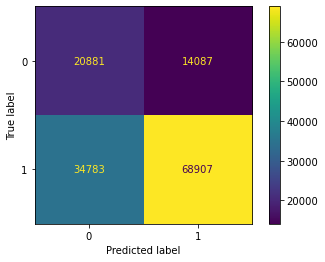

In [13]:
plot_confusion_matrix(svm_m, X=x_test, y_true=y_test) ;

## Plot ROC curve

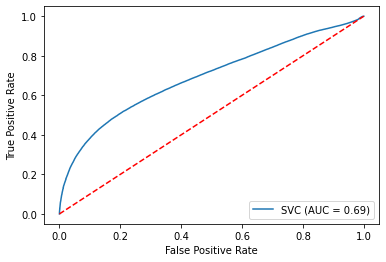

In [12]:
metrics.plot_roc_curve(svm_m, x_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

### References:


+ https://scikit-learn.org/stable/modules/svm.html
+ https://docs.python.org/3/library/pickle.html